In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
killdf=pd.read_csv("data/PoliceKillingsUS.csv",encoding="windows-1252")
houseincomedf=pd.read_csv("data/MedianHouseholdIncome2015.csv",encoding="windows-1252")
povertyleveldf=pd.read_csv("data/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
highschooldf=pd.read_csv("data/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
racedf=pd.read_csv("data/ShareRaceByCity.csv",encoding="windows-1252")


In [3]:
povertyleveldf.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


### 1

In [4]:
povertyleveldf["poverty_rate"].replace("-",np.NaN,inplace=True)

In [5]:
povertyleveldf["poverty_rate"]=povertyleveldf["poverty_rate"].astype(float)

In [6]:
lenn=povertyleveldf.groupby("Geographic Area").count()[["poverty_rate"]]
summ=povertyleveldf.groupby("Geographic Area").sum()[["poverty_rate"]]
average=summ[["poverty_rate"]]/lenn[["poverty_rate"]]
average.head()

,poverty_rate
Geographic Area,
AK,19.852994
AL,20.647089
AR,22.963216
AZ,25.666441
CA,17.124650


In [7]:
lenn.columns=["lenn"]
summ.columns=["summ"]
average.columns=["average"]
pd.concat([lenn,summ,average],axis=1)

,lenn,summ,average
Geographic Area,,,
AK,334,6630.9,19.852994
AL,584,12057.9,20.647089
AR,541,12423.1,22.963216
AZ,444,11395.9,25.666441
CA,1501,25704.1,17.124650
CO,452,6040.0,13.362832
CT,144,1315.8,9.137500
DC,1,18.0,18.000000
DE,77,966.8,12.555844


In [8]:
sort_data_povertylevel=average["average"].sort_values(ascending=False)

In [9]:
sort_data_povertylevel.head()

Geographic Area
MS    26.884254
AZ    25.666441
GA    23.777404
NM    23.080787
AR    22.963216
Name: average, dtype: float64

Text(0.5, 1.0, 'Poverty Rate Given States')

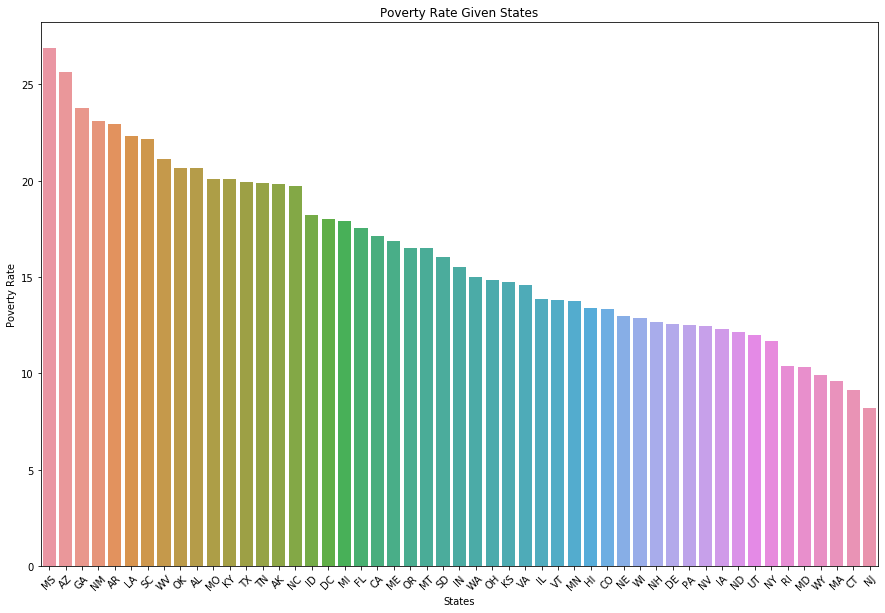

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x=sort_data_povertylevel.index, y=sort_data_povertylevel)
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

### 2

In [12]:
killdf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
from collections import Counter

killdf["name_over"]=[i.split(" ")[0] for i in killdf["name"]]
'''
name=[i.split(" ")[0] for i in killdf["name"]]
tekrar=Counter(name)
nameover=[]
[nameover.append(i) for i, v in tekrar.items() if v > 20]
nameover
'''

'\nname=[i.split(" ")[0] for i in killdf["name"]]\ntekrar=Counter(name)\nnameover=[]\n[nameover.append(i) for i, v in tekrar.items() if v > 20]\nnameover\n'

In [14]:
al=killdf["name_over"].value_counts()[:10]
al

Michael        75
TK             51
James          47
David          46
William        42
Robert         40
John           39
Daniel         35
Christopher    35
Joseph         34
Name: name_over, dtype: int64

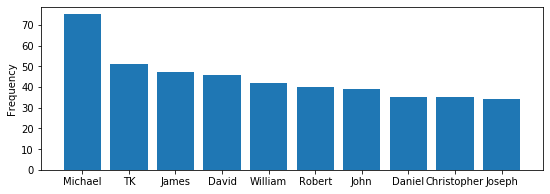

In [15]:
plt.figure(figsize = (9,3))
plt.bar(al.index, al.values)
plt.xticks(al.index, al.index.values)
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

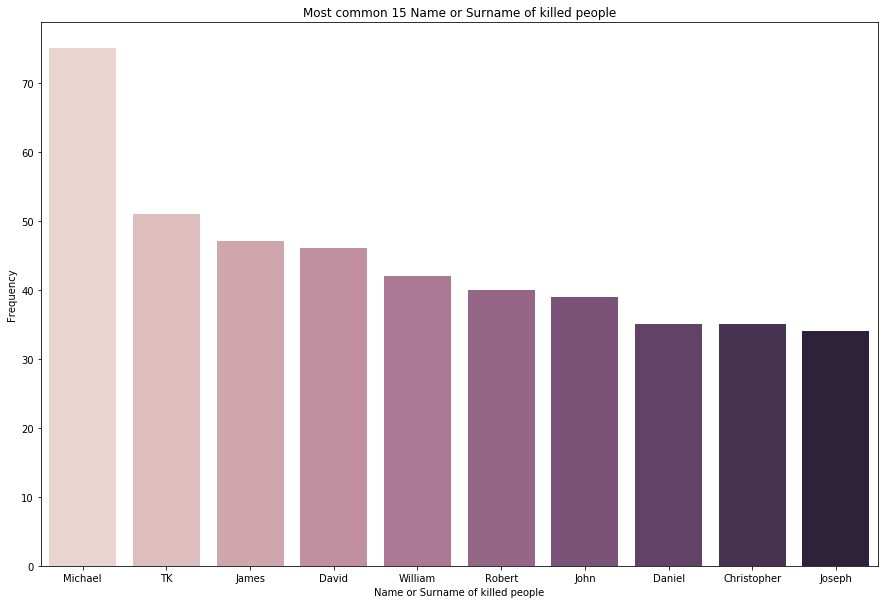

In [16]:
x=al.index
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=al.values,palette = sns.cubehelix_palette(x.size))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

### 3

In [17]:
highschooldf.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [18]:
highschooldf[highschooldf["percent_completed_hs"]=="-"]=np.NaN

In [19]:
highschooldf["percent_completed_hs"]=highschooldf["percent_completed_hs"].astype(float)

In [20]:
lenn=highschooldf.groupby("Geographic Area").count()["City"]
summ=highschooldf.groupby("Geographic Area").sum()["percent_completed_hs"]
average=summ/lenn
sort_data_highschool=average.sort_values(ascending=False)
sort_data_highschool.head()

Geographic Area
MA    92.404082
WY    92.100538
HI    91.665563
UT    91.617925
CT    91.591667
dtype: float64

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

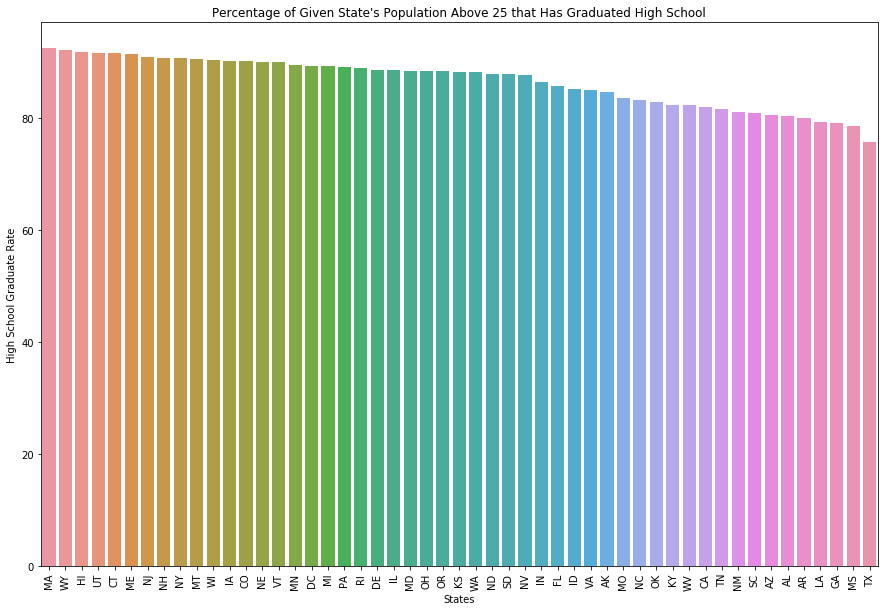

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x=sort_data_highschool.index, y=sort_data_highschool.values)
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

### 4

In [22]:
racedf.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [23]:
racedf.replace("(X)",np.NaN,inplace=True)
racedf.replace("-",np.NaN,inplace=True)

In [24]:
racedf[["share_white","share_black","share_native_american","share_asian","share_hispanic"]]=racedf[["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)

In [25]:
summ=racedf.groupby("Geographic area").sum()
lenn=racedf.groupby("Geographic area").count()
average=summ/lenn

In [26]:
racelist=["share_white","share_black","share_native_american","share_asian","share_hispanic"]
colorlist=["green","blue","cyan","yellow","red"]

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

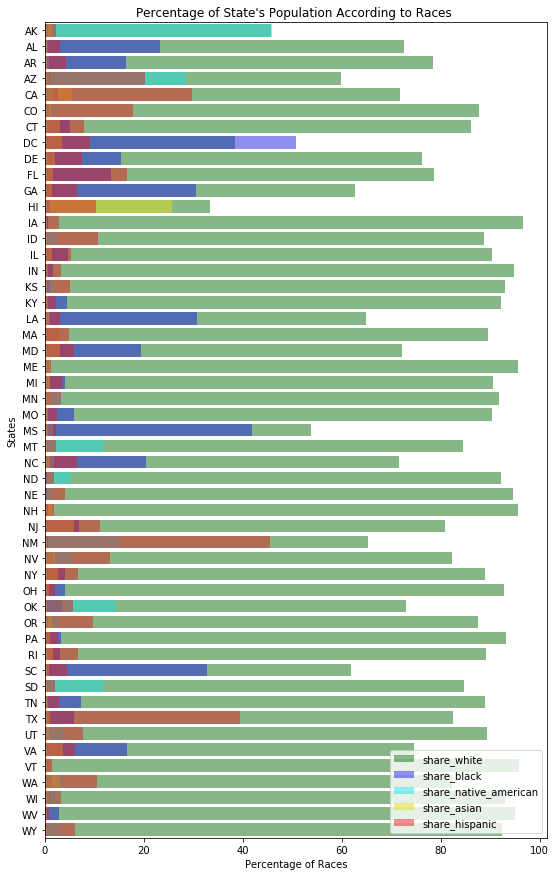

In [27]:
f,ax = plt.subplots(figsize = (9,15))
for i in range(len(racelist)):
    sns.barplot(x=average[racelist[i]].values,y=average.index,color=colorlist[i],alpha = 0.5,label=racelist[i] )
ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")  

###  Point Plot

In [28]:
sort_data_highschool=pd.DataFrame(sort_data_highschool)
sort_data_highschool.columns=["highschool_ratio"]
sort_data_highschool.head()

,highschool_ratio
Geographic Area,
MA,92.404082
WY,92.100538
HI,91.665563
UT,91.617925
CT,91.591667


In [29]:
sort_data_povertylevel=pd.DataFrame(sort_data_povertylevel)
sort_data_povertylevel.columns=["povertylevel_ratio"]
sort_data_povertylevel.head()

,povertylevel_ratio
Geographic Area,
MS,26.884254
AZ,25.666441
GA,23.777404
NM,23.080787
AR,22.963216


In [30]:
#normalize ediyoruz
sort_data_povertylevel["povertylevel_ratio"]=sort_data_povertylevel["povertylevel_ratio"]/max(sort_data_povertylevel["povertylevel_ratio"])
sort_data_highschool["highschool_ratio"]=sort_data_highschool["highschool_ratio"]/max(sort_data_highschool["highschool_ratio"])
data=pd.concat([sort_data_povertylevel,sort_data_highschool['highschool_ratio']],axis=1)
data.sort_values("povertylevel_ratio",inplace=True)
data.head()

C:\Users\ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,povertylevel_ratio,highschool_ratio
NJ,0.304676,0.983225
CT,0.339883,0.991208
MA,0.356540,1.000000
WY,0.367788,0.996715
MD,0.383578,0.956911


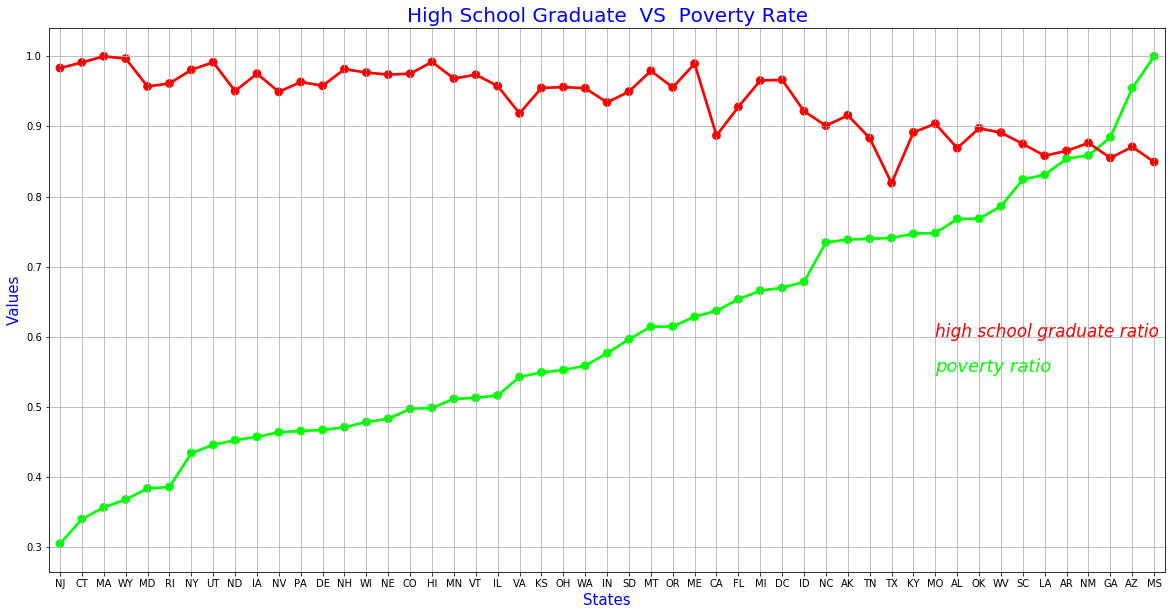

In [31]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x=data.index,y='povertylevel_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x=data.index,y='highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

### Joint Plot

C:\Users\ali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


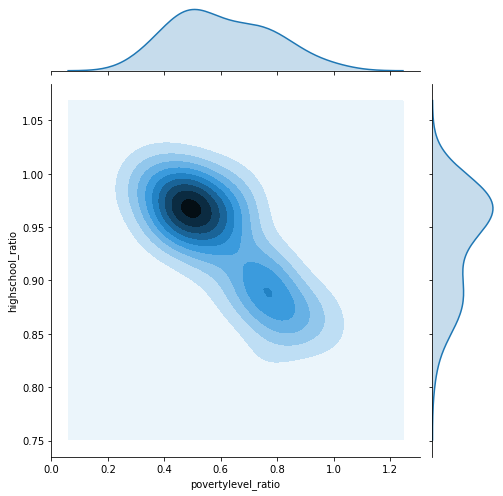

In [32]:
g = sns.jointplot(data.povertylevel_ratio, data.highschool_ratio, kind="kde", size=7)
plt.show()

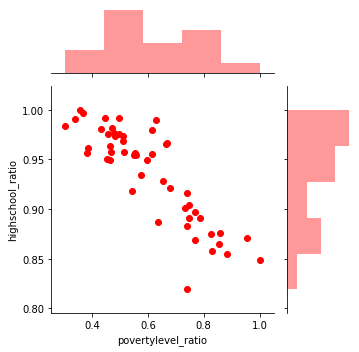

In [33]:
g = sns.jointplot("povertylevel_ratio", "highschool_ratio", data=data,size=5, ratio=3, color="r")

C:\Users\ali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


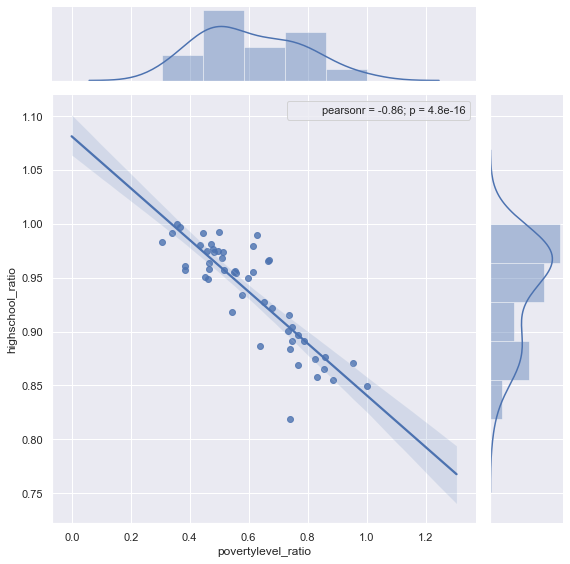

In [34]:
#pearsonr korelasyon bilgisini verir -1 ile 1 arasında değer alır neagtif pozitif korelasyon
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('povertylevel_ratio', 'highschool_ratio', data = data, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

### Pie Chart

In [35]:
killdf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,name_over
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael


In [36]:
killdf["race"].head(10)

0    A
1    W
2    H
3    W
4    H
5    W
6    H
7    W
8    W
9    B
Name: race, dtype: object

In [37]:
killdf["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

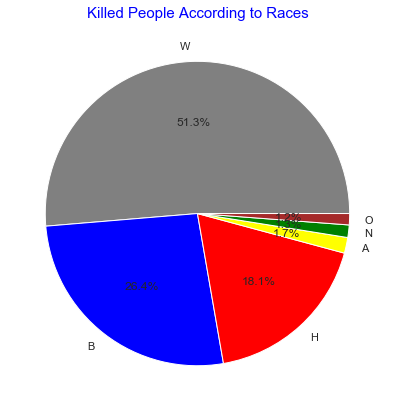

In [38]:
killdf.race.dropna(inplace = True)
labels = killdf.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = killdf.race.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

In [39]:
sizes

array([1201,  618,  423,   39,   31,   28], dtype=int64)

In [40]:
!pip install plotly==4.7.1

In [41]:
import plotly.express as px
#df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie( values=sizes, names=labels, title='Population of European continent')
fig.write_html('first_figure.html', auto_open=True)

### Lm Plot

In [42]:
data.head()

,povertylevel_ratio,highschool_ratio
NJ,0.304676,0.983225
CT,0.339883,0.991208
MA,0.356540,1.000000
WY,0.367788,0.996715
MD,0.383578,0.956911


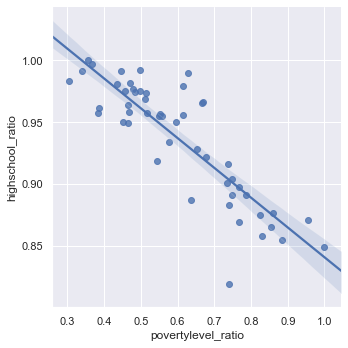

In [43]:
sns.lmplot(x="povertylevel_ratio", y="highschool_ratio",
               height=5, data=data)

### Kde Plot

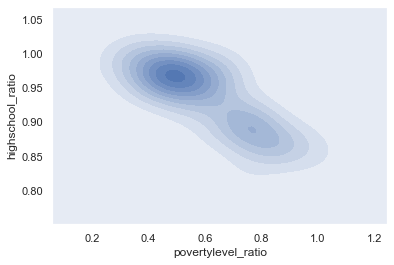

In [44]:
#datamızzdaki yoğunluğun nerede olduğunu görebiliyoruz
sns.kdeplot(data.povertylevel_ratio, data.highschool_ratio ,shade=True, cut=3)
plt.show()

### Violin Plot

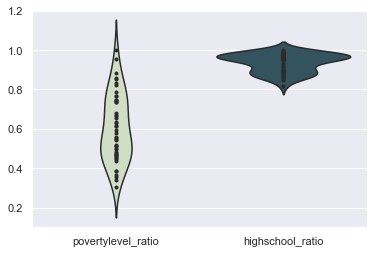

In [45]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

### Heatmap

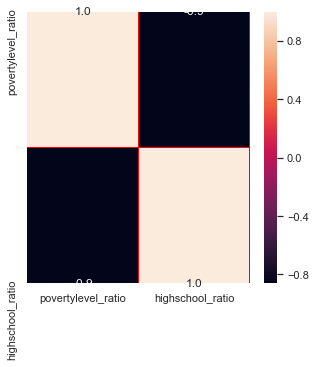

In [46]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

### Box Plot

In [47]:
killdf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,name_over
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael


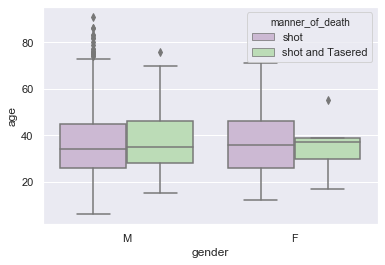

In [48]:
#manner of death(ölüm şekli): ateş edilerek, ateş edilerek ve şok tabancasıyla
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=killdf, palette="PRGn")
plt.show()

### Swarm Plot

C:\Users\ali\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning:

invalid value encountered in less

C:\Users\ali\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning:

invalid value encountered in greater



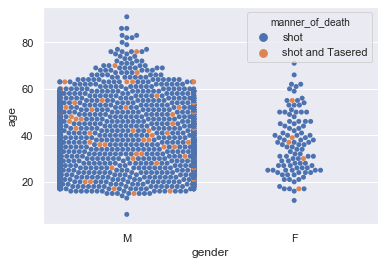

In [49]:
ax = sns.swarmplot(x="gender", y="age",hue="manner_of_death",data=killdf)

### Pair Plot

In [50]:
data.head()

,povertylevel_ratio,highschool_ratio
NJ,0.304676,0.983225
CT,0.339883,0.991208
MA,0.356540,1.000000
WY,0.367788,0.996715
MD,0.383578,0.956911


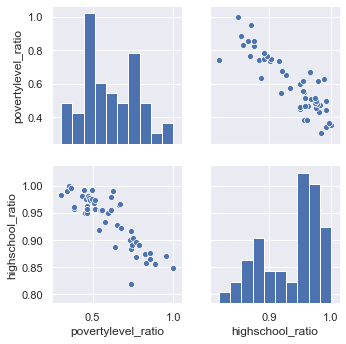

In [51]:
sns.pairplot(data)
plt.show()

### Count Plot

In [52]:
killdf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,name_over
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael


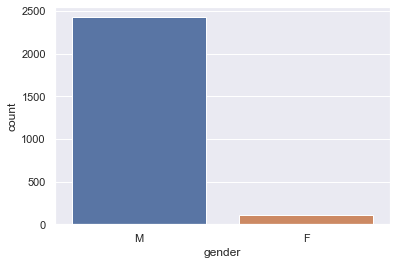

In [53]:
sns.countplot(x="gender", data=killdf);

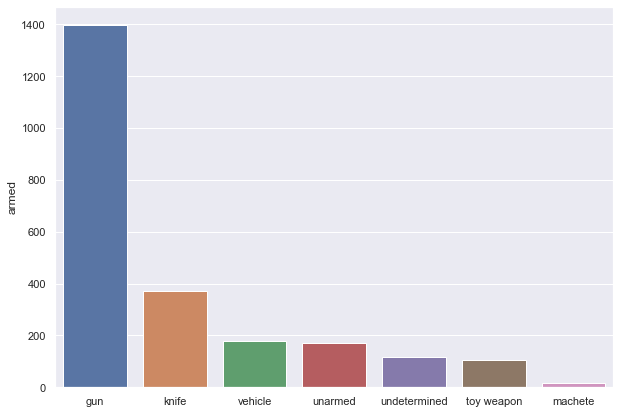

In [54]:
plt.figure(figsize=(10,7))
y=killdf["armed"].value_counts()[:7]
x=y.index
ax = sns.barplot(x=x,y=y, data=killdf)

In [55]:
killdf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,name_over
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Tim
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Lewis
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,John
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Matthew
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Michael


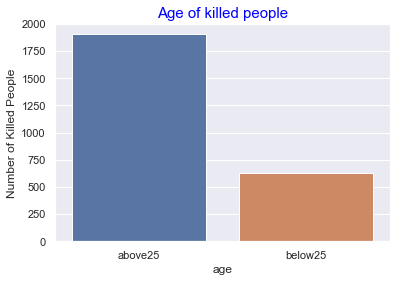

In [56]:
above_below25=["above25"if i>25 else "below25" for i in killdf["age"]]
above_below25_df=pd.DataFrame({"age":above_below25})
sns.countplot(x="age",data=above_below25_df)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15);

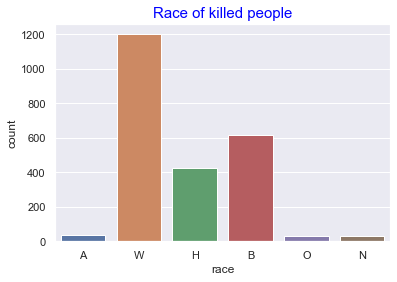

In [65]:
plt.title('Race of killed people',color = 'blue',fontsize=15)
sns.countplot(x="race",data=killdf);

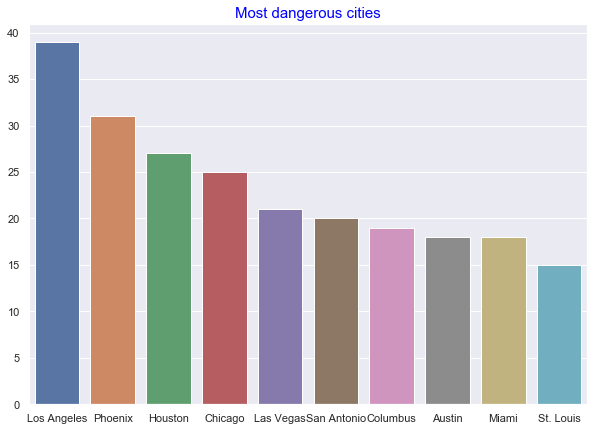

In [63]:
x=killdf["city"].value_counts()[:10]
plt.figure(figsize=(10,7))
y=x.values
x=x.index
plt.title('Most dangerous cities',color = 'blue',fontsize=15)
sns.barplot(x=x,y=y,data=killdf);